<a href="https://colab.research.google.com/github/anisha99999/DNNs/blob/master/Copy_of_Assignment7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization

% matplotlib inline
from keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, Input, DepthwiseConv2D, Concatenate,Reshape
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils,plot_model
from keras import layers, models
from matplotlib import pyplot
from keras.utils import plot_model
import pandas as pd
import os
import cv2

from keras.preprocessing.image import img_to_array,array_to_img
from keras.preprocessing import image
from PIL import Image
from IPython.display import display

import tensorflow as tf
import tensorflow.keras.backend as K
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [25]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print (train_features.shape)
from matplotlib import pyplot as plt
%matplotlib inline
#plt.imshow(train_features[1])
print(type(train_features))
train_features.shape
len(train_labels)

(50000, 32, 32, 3)
<class 'numpy.ndarray'>


50000

In [26]:
!wget https://indiasendangered.com/wp-content/uploads/2011/09/elephant.jpg
!wget https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg
!wget https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png

--2020-08-15 23:40:20--  https://indiasendangered.com/wp-content/uploads/2011/09/elephant.jpg
Resolving indiasendangered.com (indiasendangered.com)... 199.79.62.149
Connecting to indiasendangered.com (indiasendangered.com)|199.79.62.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137242 (134K) [image/jpeg]
Saving to: ‘elephant.jpg.1’

elephant.jpg.1      100%[===================>] 134.03K   214KB/s    in 0.6s    

2020-08-15 23:40:22 (214 KB/s) - ‘elephant.jpg.1’ saved [137242/137242]

--2020-08-15 23:40:24--  https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.8.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.8.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25761 (25K) [image/jpeg]
Saving to: ‘Chinook-On-White-03.jpg.1’

Chinook-On-White-03 100%[===================>]  25.16K   116KB/s    in 0.2s    

2

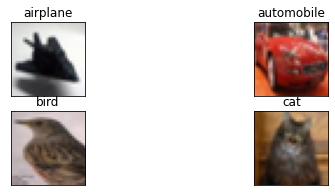

In [27]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
#for i in range(num_classes):
for i in range(4):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[i]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()



#for_heatmap_plot = dict ()

#for_heatmap_plot[ class_names[i] ] = train_features[idx]

In [28]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [29]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

[[[0.6039216  0.69411767 0.73333335]
  [0.49411765 0.5372549  0.53333336]
  [0.4117647  0.40784314 0.37254903]
  ...
  [0.35686275 0.37254903 0.2784314 ]
  [0.34117648 0.3529412  0.2784314 ]
  [0.30980393 0.31764707 0.27450982]]

 [[0.54901963 0.627451   0.6627451 ]
  [0.5686275  0.6        0.6039216 ]
  [0.49019608 0.49019608 0.4627451 ]
  ...
  [0.3764706  0.3882353  0.30588236]
  [0.3019608  0.3137255  0.24313726]
  [0.2784314  0.28627452 0.23921569]]

 [[0.54901963 0.60784316 0.6431373 ]
  [0.54509807 0.57254905 0.58431375]
  [0.4509804  0.4509804  0.4392157 ]
  ...
  [0.30980393 0.32156864 0.2509804 ]
  [0.26666668 0.27450982 0.21568628]
  [0.2627451  0.27058825 0.21568628]]

 ...

 [[0.6862745  0.654902   0.6509804 ]
  [0.6117647  0.6039216  0.627451  ]
  [0.6039216  0.627451   0.6666667 ]
  ...
  [0.16470589 0.13333334 0.14117648]
  [0.23921569 0.20784314 0.22352941]
  [0.3647059  0.3254902  0.35686275]]

 [[0.64705884 0.6039216  0.5019608 ]
  [0.6117647  0.59607846 0.50980395]


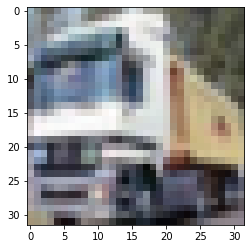

In [30]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
print(np.array(train_features[1]))
plt.imshow(train_features[2])
#pyplot.show()
plt.imshow(train_features[1])
#plt.show()

img_4=image.array_to_img(train_features[1])
img_4.save('img_4.jpg')
img_4load = image.load_img('img_4.jpg', target_size=(32, 32))
img_4load_array = image.img_to_array(img_4load)
print(img_4load_array)

In [31]:
# Define the model
def model_heatmap():
  model = Sequential()
  model.add(Convolution2D(48, 3, padding='same',input_shape=(32, 32, 3))) #32x32x48
  model.add(Activation('relu'))
  model.add(Convolution2D(48, 3)) #30x30x48
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #15x15x48
  model.add(Dropout(0.25))

  model.add(Convolution2D(96, 3, padding='same')) #15x15x96
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3,)) #13x13x96
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #6x6x96
  model.add(Dropout(0.25))

  model.add(Convolution2D(192, 3, padding='same')) #6x6x192
  model.add(Activation('relu'))
#model.add(Convolution2D(192, 3, 3)) 
#model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #3x3x192
  model.add(Dropout(0.25))

#model.add(Convolution2D(192, 3, 3, padding='same')) #3x3x192
#model.add(Activation('relu'))
  model.add(Convolution2D(192, 3)) #1x1x192
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(Convolution2D(512, 1))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
#model.add(Convolution2D(256, 1))
#model.add(Activation('relu'))
  model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
  model.add(Dropout(0.5))
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
# Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  #print(model.summary ())
  return model
model1 = [model_heatmap (), model_heatmap ()]
model=model_heatmap ()
#print(model1[0].summary ())
print(model.summary ())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_56 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_57 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 15, 15, 96)       

In [38]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
#model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
#                                 validation_data = (test_features, test_labels), verbose=1)

model_info = model.fit(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = None, epochs = 40, 
                                 validation_data = (test_features, test_labels), verbose=1)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
#plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1[0]))


Epoch 1/40
391/391 [==============================] - 8s 19ms/step - loss: 0.6917 - accuracy: 0.7651 - val_loss: 0.6568 - val_accuracy: 0.7797
Epoch 2/40
391/391 [==============================] - 7s 19ms/step - loss: 0.6726 - accuracy: 0.7710 - val_loss: 0.6579 - val_accuracy: 0.7752
Epoch 3/40
391/391 [==============================] - 7s 19ms/step - loss: 0.6512 - accuracy: 0.7778 - val_loss: 0.6161 - val_accuracy: 0.7918
Epoch 4/40
391/391 [==============================] - 7s 19ms/step - loss: 0.6261 - accuracy: 0.7852 - val_loss: 0.6170 - val_accuracy: 0.7854
Epoch 5/40
391/391 [==============================] - 7s 19ms/step - loss: 0.6186 - accuracy: 0.7912 - val_loss: 0.5871 - val_accuracy: 0.7998
Epoch 6/40
391/391 [==============================] - 7s 19ms/step - loss: 0.6021 - accuracy: 0.7941 - val_loss: 0.5899 - val_accuracy: 0.7940
Epoch 7/40
391/391 [==============================] - 7s 18ms/step - loss: 0.5885 - accuracy: 0.7999 - val_loss: 0.5955 - val_accuracy: 0.7984

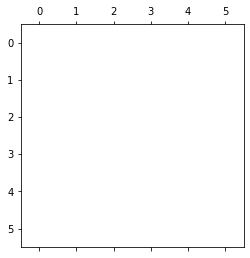

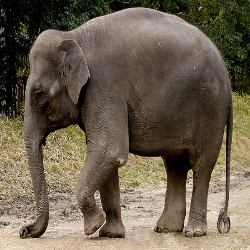

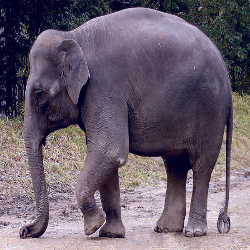

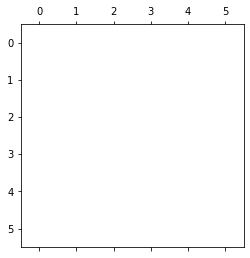

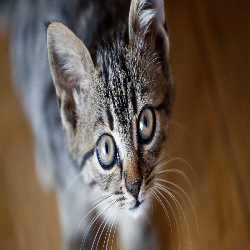

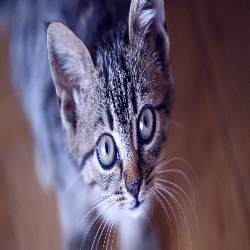

In [40]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import img_to_array,array_to_img
from keras.preprocessing import image
from PIL import Image
from IPython.display import display

# %matplotlib inline

ORIGINAL = 'elephant.jpg'

DIM = 32

img = image.load_img(ORIGINAL, target_size=(DIM, DIM))

#cv2_imshow(cv2.imread(ORIGINAL)) # Visualize image



def gradCAM(orig, intensity=0.25, res=250):
  img = image.load_img(orig, target_size=(DIM, DIM))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #x = preprocess_input(x)

  preds = model.predict(x)
  #print(decode_predictions(preds)[0][0][1]) # prints the class of image

  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('conv2d_60')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((6, 6))
  plt.matshow(heatmap)
  plt.show()
  img = cv2.imread(orig)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

  img = heatmap * intensity + img

  cv2_imshow(cv2.resize(cv2.imread(orig), (res, res)))
  cv2_imshow(cv2.resize(img, (res, res)))

  
gradCAM(ORIGINAL)
gradCAM("Thinking-of-getting-a-cat.png")